In [45]:
import pandas as pd
#import all dependencies 
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st
import numpy as np
# pd.set_option("display.max_rows", None, "display.max_columns", None)

In [46]:
# create the raw dataframe from the CSV
raw_data = pd.read_csv("raw-2005-2019 (4).csv")
regions = pd.read_csv("Country divided by regions(world Bank).csv")

# Drop unsused columns and rename needed columns for region
regions = regions[["Region", "TableName"]]
regions = regions.rename(columns={"TableName" : "Country name"})

# Create the the dataframe being used for the gini index comparison 
gini_index = pd.merge(raw_data.dropna(), regions)
gini_index_2010 = gini_index.loc[gini_index["year"] == 2010]
gini_index_2015 = gini_index.loc[gini_index["year"] == 2015]

#Create main clean data without the GINI index
clean_data = raw_data.drop("GINI index (World Bank estimate)", 1)

#Get data for the 3 most recent years
clean_data = clean_data.loc[clean_data["year"] >= 2017]


merged_data = pd.merge(clean_data, regions, on = "Country name")

#### Add the countries that were left out 

In [47]:
merged_renamed = merged_data.rename(columns={"Country name": "Country Name", "Social support": "Social Support", "Healthy life expectancy at birth": "HALE", "Life Ladder": "Happiness Score", "Log GDP per capita": "GDP per Capita(ln)"})

# Create an empty list to store the values that are not found in the regions list
not_in_list = []

# Create a list for
regions_list = regions["Country name"].tolist()

for index, row in clean_data.iterrows():
      if row["Country name"] not in regions_list:
            not_in_list.append(row["Country name"])
# Drop the duplicates to see the countries excluded from the merge due to country name issues
not_in_list = list(dict.fromkeys(not_in_list))

#After i had the unique countries that did not get merged i checked the CSV file to see why.
#If it was in the CSV file but with a different name i updated the name in the CSV file to match our dataframe
#If the country was not in the CSV file i added the data by adding its name and appropriate region that matches the CSV (Laos and Palestinian Territories)

#Print len of list that contains valued not merged to make sure that no conutries from clean data set were left out and that they all received a region
print(len(not_in_list))

#print the len of your merged data and orginal dataframe to make sure they match just for good measures and all orginal data is represented
print(len(merged_renamed), len(clean_data))

0
427 427


In [48]:
merged_renamed = merged_data.rename(columns={"Country name": "Country Name", "Social support": "Social Support", "Healthy life expectancy at birth": "HALE", "Life Ladder": "Happiness Score", "Log GDP per capita": "GDP per Capita(ln)"})

In [49]:
merged_renamed.loc[merged_renamed["Country Name"] == "United States"]

,Country Name,year,Happiness Score,GDP per Capita(ln),Social Support,HALE,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,Region
403,United States,2017,6.991759,10.905420,0.921003,68.400002,0.868497,0.194489,0.681191,0.826555,0.692602,1.552104,1.880688,0.268986,North America
404,United States,2018,6.882685,10.927395,0.903856,68.300003,0.824607,0.113378,0.709928,0.815383,0.758395,1.482865,2.119374,0.307928,North America
405,United States,2019,6.943701,10.944225,0.916691,68.199997,0.836139,0.141645,0.706716,0.814985,NaN,NaN,1.789670,0.257740,North America


#### Filter data set to only include countries that have data for all 3 years

In [50]:
#Get a working copy of the merged data to work with
loop_df = pd.DataFrame.copy(merged_renamed)
# loop_df = loop_df.loc[0:10]
#Set global variables
count = 0
country = ""
countries = []

# Create a for loop to get the countries that have data for all 3 years (2017 - 2019)
for index, row in loop_df.iterrows():
    if country != row["Country Name"]:
        country = row["Country Name"]
        count = 0
    elif country == row["Country Name"]:
        count += 1
        if count == 2:
            countries.append( row["Country Name"])

# Print the lenght of the countries with all 3 years and original data frame to see how many we are losing
print(len(countries))
print(len(loop_df["Country Name"].unique()))

#Get the new Dataframe that countries countries that have data for all 3 years
Final_df = loop_df.set_index("Country Name").loc[countries].reset_index()

#Check to see if lenght matches length of countries lists
Final_df["Country Name"].nunique()


129
153


129

#### Final Data sets

In [51]:
#Gini Data set 
gini_index
gini_index_2010
gini_index_2015



,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),Region
22,Armenia,2015,4.348320,9.008449,0.722551,66.000000,0.551027,-0.186535,0.901462,0.594143,-0.394313,-0.210170,2.237644,0.514600,0.324,Europe & Central Asia
35,Austria,2015,7.076447,10.697696,0.928110,72.099998,0.900305,0.102583,0.557480,0.798263,1.263306,1.564229,1.762817,0.249110,0.305,Europe & Central Asia
46,Belarus,2015,5.718908,9.753776,0.924073,65.199997,0.622753,-0.095122,0.668678,0.583727,-0.677531,-0.650102,2.004021,0.350420,0.256,Europe & Central Asia
56,Belgium,2015,6.904219,10.641150,0.885209,71.400002,0.869475,0.064905,0.468785,0.805178,0.987267,1.440750,1.511811,0.218969,0.277,Europe & Central Asia
58,Benin,2015,3.624664,7.594453,0.434389,53.099998,0.733384,-0.003847,0.850098,0.592222,0.141303,-0.567374,2.048732,0.565220,0.478,Sub-Saharan Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614,Turkey,2015,5.514465,10.056709,0.851225,65.599998,0.653197,-0.017012,0.806076,0.460246,-0.930817,0.056615,2.530940,0.458964,0.429,Europe & Central Asia
628,Ukraine,2015,3.964543,8.917973,0.909440,63.700001,0.430592,-0.011267,0.952473,0.574076,-1.024300,-0.727938,1.956619,0.493530,0.255,Europe & Central Asia
638,United Kingdom,2015,6.515445,10.571567,0.935986,71.699997,0.832926,0.300925,0.456134,0.797785,0.907792,1.819708,1.753815,0.269178,0.332,Europe & Central Asia
651,Uruguay,2015,6.628080,9.900736,0.891493,68.699997,0.916880,-0.038354,0.673476,0.892661,1.073821,0.745666,2.191727,0.330673,0.402,Latin America & Caribbean


# GINI,GDP and Happiness

In [52]:
#See the descriptive statistics 
gini_index_2010.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate)
count,63.0,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,2010.0,5.950958,9.724583,0.861334,66.642857,0.713877,0.000377,0.764555,0.724362,0.231355,0.391032,1.940533,0.338320,0.361270
std,0.0,1.026825,0.833115,0.099328,4.642848,0.147167,0.188005,0.192947,0.117236,0.798604,0.925530,0.301559,0.089404,0.082326
min,2010.0,3.912276,7.594235,0.540389,50.500000,0.364206,-0.302790,0.174896,0.473150,-1.737298,-1.002261,1.336110,0.178103,0.248000
25%,2010.0,5.112523,9.215052,0.815769,64.450001,0.582011,-0.139956,0.693536,0.637658,-0.441997,-0.459970,1.751516,0.274466,0.301500
50%,2010.0,5.866131,9.795860,0.889153,66.800003,0.730258,-0.049502,0.819940,0.736898,0.352862,0.183388,1.941183,0.328852,0.337000
75%,2010.0,6.800145,10.410388,0.927166,70.850002,0.831868,0.096876,0.913748,0.829442,0.949773,1.088513,2.080593,0.390914,0.398500
max,2010.0,7.770515,11.426749,0.974977,72.900002,0.943631,0.532877,0.983276,0.901268,1.518027,2.058373,3.222718,0.680613,0.634000


In [ ]:
# regimen_group = clean_data.groupby('Drug Regimen')
# count_mice_per_drug= regimen_group['Mouse ID'].count()


# #Generate Scatter plot and linear regression in 2010 
# fig,ax = plt.subplots(figsize=(12,6))
# x_values = pd.to_numeric(gini_index_2010['Life Ladder']).astype(float)
# y_values = pd.to_numeric(gini_index_2010['GINI index (World Bank estimate)']).astype(float)
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")
# ax.annotate(line_eq, xy=(20, 40), xycoords='data',xytext=(0.8, 0.65), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',fontsize=15,color="red")
# #plt.annotate(line_eq,(6,10),fontsize=12,color="red")
# plt.xlabel("Life Ladder")
# plt.ylabel("GINI Index")
# plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")

# # #print the statistical values to see the relationship between the two variables
# # correlation = st.pearsonr(x_values,y_values)
# # print(f"The correlation coefficient is {round(correlation[0],2)}")
# print(f"Regression line equation is: {line_eq}")
# print(f"The r-squared is: {rvalue**2}")

# plt.show()


In [ ]:
#Data set with the countries that have data for all 3 years 
Final_df

In [ ]:
#drop all NaN values 
cleaned_gini_df = gini_df.dropna(subset = ['2014', '2015'])
# cleaned_gini.dtypes
cleaned_gini_df.head()

# Understanding log GDP: log GDP is not simply a growth rate of GDP!!!

log GDP is the absolute value that converted from the actual number.
log formula = ln x = log e^x

Reasons why we're using log GDP instead of actual number. Long story to short: 
1. To make outliers not look like outliers (to make "bad" data to be well behaved). Though it's far from the median/mean values, it makes it easier to read.  
2. To simplify the numbers and their complexity of interaction terms. A logarithm makes all data to be positive which would make it easier to draw a graph and linearize a relationship 

# Anlyasis 1) The Relationship between log GDP and Happiness

### 2010

Regression line equation is: y = 0.79x + -1.74
The r-squared is: 0.4117974248212296


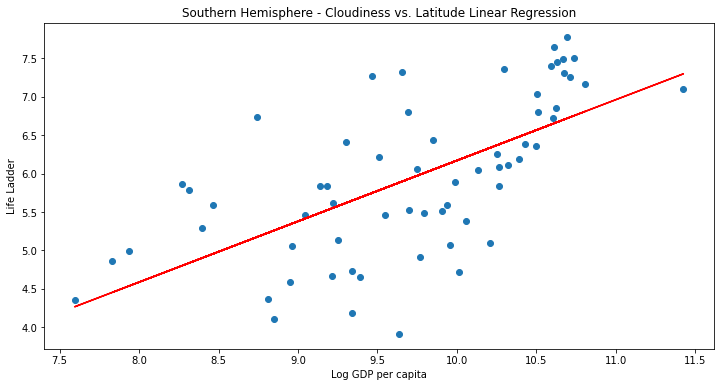

In [59]:
#Generate a scatter plot and linear regression
fig,ax = plt.subplots(figsize=(12,6))
x_values = pd.to_numeric(gini_index_2010['Log GDP per capita']).astype(float)
y_values = pd.to_numeric(gini_index_2010['Life Ladder']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
ax.annotate(line_eq, xy=(20, 40), xycoords='data',xytext=(0.8, 0.65), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',fontsize=15,color="red")
#plt.annotate(line_eq,(6,10),fontsize=12,color="red")
plt.xlabel("Log GDP per capita")
plt.ylabel("Life Ladder")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")

# #print the statistical values to see the relationship between the two variables
# correlation = st.pearsonr(x_values,y_values)
# print(f"The correlation coefficient is {round(correlation[0],2)}")
print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue**2}")

plt.show()



### 2015 

Regression line equation is: y = 0.8x + -2.0
The r-squared is: 0.5805338096308975


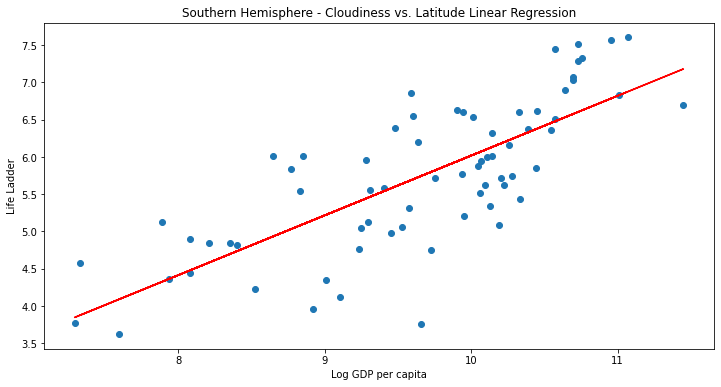

In [82]:
#Generate a scatter plot and linear regression
fig,ax = plt.subplots(figsize=(12,6))
x_values = pd.to_numeric(gini_index_2015['Log GDP per capita']).astype(float)
y_values = pd.to_numeric(gini_index_2015['Life Ladder']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
ax.annotate(line_eq, xy=(20, 40), xycoords='data',xytext=(0.8, 0.65), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',fontsize=15,color="red")
#plt.annotate(line_eq,(6,10),fontsize=12,color="red")
plt.xlabel("Log GDP per capita")
plt.ylabel("Life Ladder")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")

# #print the statistical values to see the relationship between the two variables
# correlation = st.pearsonr(x_values,y_values)
# print(f"The correlation coefficient is {round(correlation[0],2)}")
print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue**2}")

plt.show()

# Analysis 2) The Relationship between GINI Indx and Happiness

### 2010

Regression line equation is: y = -0.58x + 6.16
The r-squared is: 0.002187511654227114


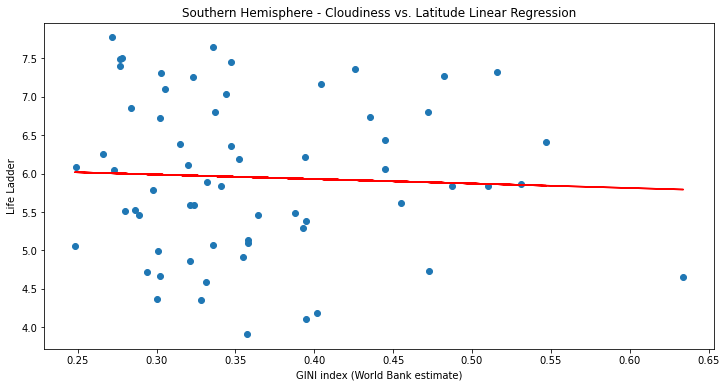

In [60]:
#Generate a scatter plot and linear regression
fig,ax = plt.subplots(figsize=(12,6))
x_values = pd.to_numeric(gini_index_2010['GINI index (World Bank estimate)']).astype(float)
y_values = pd.to_numeric(gini_index_2010['Life Ladder']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
ax.annotate(line_eq, xy=(20, 40), xycoords='data',xytext=(0.8, 0.65), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',fontsize=15,color="red")
#plt.annotate(line_eq,(6,10),fontsize=12,color="red")
plt.xlabel("GINI index (World Bank estimate)")
plt.ylabel("Life Ladder")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")

# #print the statistical values to see the relationship between the two variables
# correlation = st.pearsonr(x_values,y_values)
# print(f"The correlation coefficient is {round(correlation[0],2)}")
print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue**2}")

plt.show()


### 2015

Regression line equation is: y = -3.72x + 7.11
The r-squared is: 0.08508987931370365


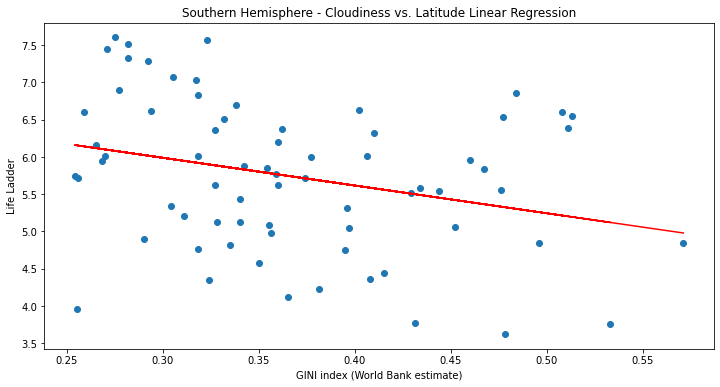

In [83]:
#Generate a scatter plot and linear regression
fig,ax = plt.subplots(figsize=(12,6))
x_values = pd.to_numeric(gini_index_2015['GINI index (World Bank estimate)']).astype(float)
y_values = pd.to_numeric(gini_index_2015['Life Ladder']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
ax.annotate(line_eq, xy=(20, 40), xycoords='data',xytext=(0.8, 0.65), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',fontsize=15,color="red")
#plt.annotate(line_eq,(6,10),fontsize=12,color="red")
plt.xlabel("GINI index (World Bank estimate)")
plt.ylabel("Life Ladder")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")

# #print the statistical values to see the relationship between the two variables
# correlation = st.pearsonr(x_values,y_values)
# print(f"The correlation coefficient is {round(correlation[0],2)}")
print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue**2}")

plt.show()


# Analysis 3) The Relationship between GINI Index and GDP

### 2010 

Regression line equation is: y = -2.74x + 10.71
The r-squared is: 0.07324954560194219


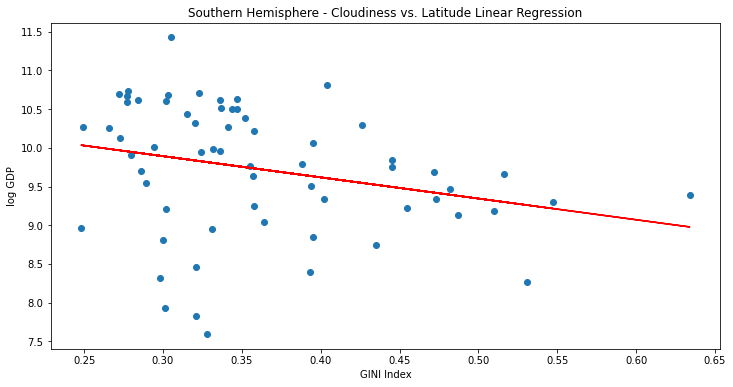

In [61]:
#Generate a scatter plot and linear regression
fig,ax = plt.subplots(figsize=(12,6))
x_values = pd.to_numeric(gini_index_2010['Log GDP per capita']).astype(float)
y_values = pd.to_numeric(gini_index_2010['GINI index (World Bank estimate)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
ax.annotate(line_eq, xy=(20, 40), xycoords='data',xytext=(0.8, 0.65), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',fontsize=15,color="red")
#plt.annotate(line_eq,(6,10),fontsize=12,color="red")
plt.xlabel("GINI Index")
plt.ylabel("log GDP")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")

# #print the statistical values to see the relationship between the two variables
# correlation = st.pearsonr(x_values,y_values)
# print(f"The correlation coefficient is {round(correlation[0],2)}")
print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue**2}")

plt.show()

### 2015 

Regression line equation is: y = -0.03x + 0.69
The r-squared is: 0.16560724063031973


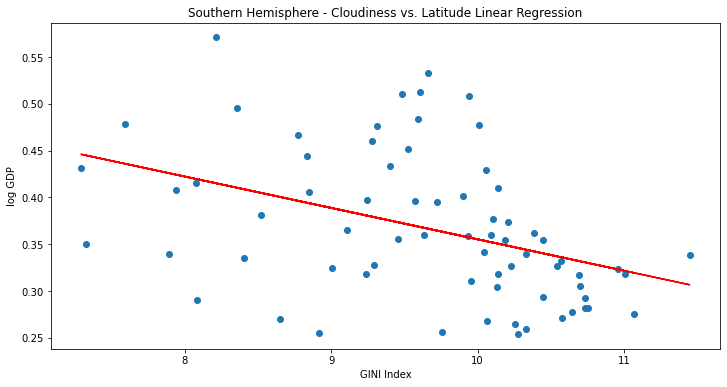

In [84]:
#Generate a scatter plot and linear regression
fig,ax = plt.subplots(figsize=(12,6))
x_values = pd.to_numeric(gini_index_2015['Log GDP per capita']).astype(float)
y_values = pd.to_numeric(gini_index_2015['GINI index (World Bank estimate)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
ax.annotate(line_eq, xy=(20, 40), xycoords='data',xytext=(0.8, 0.65), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',fontsize=15,color="red")
#plt.annotate(line_eq,(6,10),fontsize=12,color="red")
plt.xlabel("GINI Index")
plt.ylabel("log GDP")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")

# #print the statistical values to see the relationship between the two variables
# correlation = st.pearsonr(x_values,y_values)
# print(f"The correlation coefficient is {round(correlation[0],2)}")
print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue**2}")

plt.show()

In [ ]:
# x_values = pd.to_numeric(merged_gini_df['Life Ladder']).astype(float)
# y_values = pd.to_numeric(merged_gini_df['Growth Rate']).astype(float)

# 4 Analysis of each group's relationship with Happiness 

Grouped into 4 then see the difference. 

*group 2 has shown the highest happiness score while group 1 and 3 show similar score. 
group1) low GINI & low log GDP - 4.8
group2) low GINI & high log GDP - 6.5
group3) high GINI & low log GDP - 4.7 
group4) high GINI & high log GDP - 5.7 

This data would indicate that how much you earn is more relevant to your happiness than the degree of economic inequality. 

- Draw a bar/scatter plots to visualize this data. 

In [76]:
#Divde into 4 groups to see the relationship with happiness
group_1 = gini_index_2015.loc[(gini_index_2015["GINI index (World Bank estimate)"]< 0.338) & (gini_index_2015["Log GDP per capita"] < 9.27), :]
group_2 = gini_index_2015.loc[(gini_index_2015["GINI index (World Bank estimate)"]< 0.338) & (gini_index_2015["Log GDP per capita"] >= 9.27), :]
group_3 = gini_index_2015.loc[(gini_index_2015["GINI index (World Bank estimate)"]> 0.338) & (gini_index_2015["Log GDP per capita"] < 9.27), :]
group_4 = gini_index_2015.loc[(gini_index_2015["GINI index (World Bank estimate)"]> 0.338) & (gini_index_2015["Log GDP per capita"] > 9.27), :]
group_1.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate)
count,6.0,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,2015.0,4.803574,8.715370,0.769991,62.316667,0.605974,-0.007866,0.842653,0.618374,-0.859543,-0.625442,1.989578,0.423871,0.298667
std,0.0,0.692418,0.424408,0.125761,2.968783,0.126525,0.142370,0.115526,0.073889,0.562259,0.238740,0.205293,0.085934,0.032060
min,2015.0,3.964543,8.081330,0.561720,57.299999,0.430592,-0.186535,0.684498,0.574076,-1.602387,-0.889031,1.693320,0.281400,0.255000
25%,2015.0,4.451874,8.463898,0.724349,61.325000,0.559907,-0.083779,0.751912,0.579037,-1.263724,-0.725450,1.871649,0.386658,0.275000
50%,2015.0,4.792867,8.782713,0.784825,63.050001,0.590894,-0.032515,0.879594,0.592263,-0.833800,-0.714547,1.989502,0.438960,0.304000
75%,2015.0,4.884831,8.985830,0.852415,63.575001,0.643256,0.054236,0.932705,0.605731,-0.456560,-0.550094,2.143727,0.484801,0.322500
max,2015.0,6.017472,9.234304,0.909440,66.000000,0.813176,0.222086,0.952473,0.766794,-0.149424,-0.210170,2.237644,0.514600,0.335000


In [77]:
group_2.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate)
count,24.0,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,2015.0,6.511841,10.470127,0.901516,70.079166,0.827373,0.046293,0.566174,0.744007,0.869458,1.177695,1.776018,0.279018,0.296792
std,0.0,0.781898,0.463057,0.073849,2.865686,0.117336,0.176825,0.247024,0.077302,0.598940,0.799622,0.170373,0.057491,0.027039
min,2015.0,5.131612,9.292890,0.609470,62.799999,0.557721,-0.235859,0.191016,0.572956,-0.677531,-0.650102,1.447880,0.197678,0.254000
25%,2015.0,5.897657,10.204168,0.895062,68.074999,0.780130,-0.104858,0.400415,0.711985,0.842087,0.757472,1.643251,0.224308,0.274000
50%,2015.0,6.610706,10.556289,0.924998,71.450001,0.879452,0.059327,0.563107,0.754380,0.999121,1.390697,1.792481,0.270956,0.299000
75%,2015.0,7.129566,10.730309,0.936573,72.124998,0.916084,0.213682,0.811278,0.800785,1.246775,1.845022,1.882352,0.331200,0.319250
max,2015.0,7.603434,11.448145,0.959701,73.199997,0.947621,0.346334,0.927545,0.842888,1.493104,1.996956,2.051263,0.394927,0.338000


In [78]:
group_3.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate)
count,14.0,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,2015.0,4.740749,8.286294,0.705661,59.099999,0.771103,0.060063,0.765127,0.729929,-0.470916,-0.533606,2.242389,0.479361,0.424929
std,0.0,0.725515,0.633884,0.139521,5.565691,0.095350,0.241950,0.125394,0.108735,0.502554,0.422602,0.443857,0.097923,0.062786
min,2015.0,3.624664,7.291142,0.434389,47.700001,0.534058,-0.188097,0.502417,0.547280,-1.398272,-1.133447,1.620931,0.318384,0.340000
25%,2015.0,4.257289,7.901579,0.642068,54.599999,0.739701,-0.069315,0.735369,0.670142,-0.676382,-0.802224,1.983372,0.408468,0.385000
50%,2015.0,4.708160,8.282055,0.762220,59.900000,0.786204,-0.028996,0.779868,0.708072,-0.399815,-0.565477,2.086212,0.482162,0.411500
75%,2015.0,5.103858,8.816510,0.804797,63.075001,0.806639,0.094376,0.851937,0.820610,-0.105955,-0.348693,2.487411,0.548159,0.461250
max,2015.0,6.018496,9.245594,0.853589,66.599998,0.911534,0.669303,0.945967,0.876233,0.141303,0.569531,3.080448,0.636040,0.571000


In [79]:
group_4.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate)
count,26.0,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,2015.0,5.780662,9.846800,0.849960,67.465385,0.746042,-0.043195,0.832253,0.728491,0.167030,0.217474,2.186086,0.386742,0.416115
std,0.0,0.701723,0.344399,0.075788,3.598549,0.110239,0.129647,0.078333,0.113551,0.675051,0.611499,0.297073,0.088960,0.061796
min,2015.0,3.761965,9.278399,0.572407,56.799999,0.531736,-0.268624,0.665828,0.460246,-1.219647,-0.824964,1.658345,0.259902,0.340000
25%,2015.0,5.457987,9.575883,0.816592,65.650000,0.657375,-0.110953,0.806657,0.662565,-0.154667,-0.159507,2.034080,0.330364,0.360000
50%,2015.0,5.812587,9.918482,0.866269,66.850002,0.785641,-0.062959,0.831036,0.742978,0.222833,0.113378,2.227871,0.371224,0.399000
75%,2015.0,6.366028,10.103179,0.892772,69.525000,0.805161,-0.012075,0.890529,0.802427,0.715559,0.711664,2.309943,0.434846,0.472000
max,2015.0,6.854004,10.442683,0.956472,73.500000,0.916880,0.312678,0.961651,0.910497,1.073821,1.263847,2.927932,0.609152,0.533000


In [81]:
#cleaned_gini_df.count()

In [ ]:
#Subtract from the GINI values in 2015 to the values in 2014 to see the difference
# cleaned_gini_df["Growth Rate"] = cleaned_gini_df["2015"] - cleaned_gini_df["2014"]
# # cleaned_gini_df =cleaned_gini_df.reset_index(drop=True)
# cleaned_gini_df.head()

In [ ]:
#Store country name and log gdp in a new dataframe
# gdp_log = gini_index_2015[["Country name", "Log GDP per capita","Life Ladder"]]
# gdp_log = gdp_log.rename(columns={"Country name":"Country Name"})
# gdp_log
# #merge new dataframe with gini_data
# merged_gini_df = pd.merge(cleaned_gini_df, gdp_log, on=["Country Name"])
# merged_gini_df

In [62]:
#Divide two groups by GINI index 
# gini_grouped = gini_index_2010.groupby('GINI index (World Bank estimate)') 
# type(gini_grouped)
# northern_hemisphere = clean_city_data.loc[pd.to_numeric(clean_city_data["Latitude"]).astype(float) > 0, :]
# southern_hemisphere = clean_city_data.loc[pd.to_numeric(clean_city_data["Latitude"]).astype(float) < 0, :]
#gini_grouped = gini_index_2010.groupby('GINI index (World Bank estimate)') 

#high_GINI = gini_index_2010.loc[pd.to_numeric(gini_index_2010["GINI index (World Bank estimate)"]).astype(float) >= 0.33,:]
#low_GINI = gini_index_2010.loc[pd.to_numeric(gini_index_2010["GINI index (World Bank estimate)"]).astype(float) < 0.33,:]

# high_gini = []
# low_gini = []

# for gini in gini_grouped:    
#     gini_data = gini_index_2010.loc[gini_index_2010["GINI index (World Bank estimate)"].astype(float) >= 0.33]
#     high_gini.append(gini_data)
    
# else:
#     low_gini.append(gini_data)
#     print(high_gini)
#     quartiles = gini_data.quantile([0.25, 0.5, 0.75])
#     first_quartile = quartiles[0.25]
#     third_quartile = quartiles[0.75]
#     iqr = third_quartile - first_quartile 
# pass    
#     lower_bound = first_quartile - (1.5*iqr)
#     upper_bound = third_quartile + (1.5*iqr)
    #print(f"The first quartile is {first_quartile}")
#     print(f"The third quartile of {treatment} is {third_quartile}")
#     print(f"The iqr value is {iqr}")
#     print(f"The median value is {quartiles[.5]}")
#     print(f"The outliers would be below {lower_bound}")
#     print(f"The outliers would be above {upper_bound}")
#     print("---------------------------------------------------------- \n")
    # Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# tumor_vol_data_list = []

# for treatment in treatment_list: 
#     tumor_vol_data = merge_drug.loc[merge_drug["Drug Regimen"] == treatment,'Tumor Volume (mm3)']   
#     #print(tumor_vol_data)
   
#     tumor_vol_data_list.append(tumor_vol_data)
#     #print(tumor_vol_data_list)

# # Calculate the IQR and quantitatively determine if there are any potential outliers. 
#     quartiles = tumor_vol_data.quantile([0.25, 0.5, 0.75])
#     first_quartile = quartiles[0.25]
#     third_quartile = quartiles[0.75]
#     iqr = third_quartile - first_quartile 
#     # Determine outliers using upper and lower bounds
#     lower_bound = first_quartile - (1.5*iqr)
#     upper_bound = third_quartile + (1.5*iqr)
#     print(f"The first quartile of {treatment} is {first_quartile}")
#     print(f"The third quartile of {treatment} is {third_quartile}")
#     print(f"The iqr value of {treatment} is {iqr}")
#     print(f"The median value of {treatment} is {quartiles[.5]}")
#     print(f"The outliers of {treatment} would be below {lower_bound}")
#     print(f"The outliers of {treatment} would be above {upper_bound}")
#     print("---------------------------------------------------------- \n")
# # Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Find a mouse treated with Capomulin 
# high_GINI = gini_index_2010.loc[gini_index_2010["GINI index (World Bank estimate)"].astype(float) >= 0.33,:]
# low_GINI = gini_index_2010.loc[gini_index_2010["GINI index (World Bank estimate)"].astype(float) < 0.33,:]

# fig2, ax2 = plt. subplots()
# plt.scatter(high_GINI, gini_index_2010['Life Ladder'])
# plt.title ("Mouse Weight vs. Avg. Tumor Volume in responds to Capomulin")
# plt.xlabel ('Weight (g)')
# plt.ylabel ('Average Tumor Volume (mm3)')


# plotdata = pd.DataFrame(
#     {"GINI Index": [high_GINI, low_GINI]}, 
#     index=["Life Ladder"])
# # Plot a bar chart
# plotdata.plot(kind="bar")

#gini_index_2010.plot.bar(x = "GINI index (World Bank estimate)", y = "Life Ladder", alpha = 0.5, align="center")
#df[cat] = le.fit_transform(df[cat].astype(str))
# plt.bar(high_GINI, users, color='r', alpha=0.5, align="center")
# bar_chart_pandas = count_mice_per_drug.plot(kind='bar',color='g', title = 'Number of Mice for Each Treatment',figsize=(10,5), rot=45)
# bar_chart_pandas.set_xlabel("Drug Regimen")
# bar_chart_pandas.set_ylabel("Number of Mice")



# df.plot.bar(x = 'Name', y = ['Events1', 'Events2'], rot = 40)

# plt.show()
# plt.tight_layout()

# high_GINI = gini_grouped[gini_grouped['GINI index (World Bank estimate)'] >= 0.3]
# low_GINI = gini_grouped[gini_grouped['GINI index(World Bank estimate)'] <0.3]
#df1 = df[df['Sales'] >= s]

In [ ]:
#count merged gini
# merged_gini_df.count()

In [ ]:
#Select data for 2014 and 2015 to bring in. 
# fields = ['Country Name','2014', '2015']
# gini_df = pd.read_csv("API_SI.POV.GINI_DS2_en_csv_v2_1993647.csv", skipinitialspace=True, usecols=fields)
# # See the keys
# gini_df.keys()
# # See contents 
# gini_df[['Country Name','2014', '2015']]

In [54]:
#high_GINI = gini_index_2010.loc[pd.to_numeric(gini_index_2010["GINI index (World Bank estimate)"]).astype(float) >= 0.33,:]
#type(high_GINI)
#high_GINI_df = pd.Dataframe
#low_GINI = gini_index_2010.loc[pd.to_numeric(gini_index_2010["GINI index (World Bank estimate)"]).astype(float) < 0.33,:]
# df.plot(kind='scatter',x='num_children',y='num_pets',color='red')
# plt.show()

# ones = []
# for range(len(data)):
#     ones.append(1)


SyntaxError: invalid syntax (<ipython-input-54-a464911881d5>, line 9)